In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

<h4>Importowanie danych do analizy</h4>

In [7]:
eggplants_df = pd.read_excel("Dane_Eggplants_Percent.xlsx").rename(columns={"Unnamed: 0": "name"})

In [9]:
eggplants_df.head()

,name,n25,n26,n27,n28,2M-28,3M-28,n29,2M-29,3M-29,...,n34,2M-34,3M-34,n35,2M-35,3M-35,n36,2M-36,3M-36,n37
0,S. melongena Arrow,0.099409,0.057909,0.748374,0.173198,0.277108,0.101923,0.640052,0.028955,0.154921,...,3.353873,3.158140,0.616863,21.866985,0.165698,2.541626,0.442522,0.187530,0.098679,1.252270
1,S. melongena Avan 2007,0.068596,0.050842,0.616775,0.154662,0.092556,0.025421,0.576600,0.025421,0.130448,...,3.242127,3.641095,0.702100,22.817173,0.212007,2.576632,0.457572,0.176126,0.102139,1.383998
2,S. melongena Avan 2008,0.119426,0.080808,0.924386,0.178386,0.124542,0.040403,0.622272,0.040403,0.181225,...,2.756676,2.567750,0.672649,26.237973,0.200031,2.729907,0.458217,0.131446,0.104638,1.535628
3,S. melongena Black Beauty 2007,0.069196,0.054589,0.636255,0.159349,0.270534,0.106065,0.556948,0.027295,0.110651,...,3.252819,3.057304,0.774374,25.787973,0.238457,2.582489,0.556341,0.249319,0.112108,1.850026
4,S. melongena Black Beauty 2008,0.147387,0.065239,0.945064,0.158909,0.068257,0.032619,0.551907,0.032619,0.160354,...,2.597720,1.471114,0.737048,31.552584,0.152837,3.006668,0.546189,0.158083,0.127712,2.164548


<h4>Standaryzacja danych</h4>

In [22]:
eggplants_standarized = (eggplants_df.iloc[:,1:] - eggplants_df.iloc[:,1:].mean()) / eggplants_df.iloc[:,1:].std()

In [23]:
eggplants_standarized.head()

,n25,n26,n27,n28,2M-28,3M-28,n29,2M-29,3M-29,n30,...,n34,2M-34,3M-34,n35,2M-35,3M-35,n36,2M-36,3M-36,n37
0,-0.605512,-0.717849,-0.740266,-0.792681,-0.375003,2.976514,-0.747179,-0.705599,-0.118826,-0.828324,...,1.197042,1.133820,0.689783,0.705914,0.942529,0.878151,0.502612,1.381862,0.923886,0.526236
1,-0.660480,-0.730336,-0.769656,-0.824225,-0.703985,-0.435564,-0.774435,-0.769544,-0.265112,-0.829040,...,1.062302,1.611215,0.956392,0.788232,1.578877,0.904318,0.561183,1.230741,1.003361,0.689206
2,-0.569802,-0.677389,-0.700956,-0.783852,-0.646967,0.232665,-0.754816,-0.498439,0.038410,-0.830514,...,0.476962,0.550228,0.864273,1.084589,1.414318,1.018892,0.563694,0.638621,1.060769,0.876799
3,-0.659410,-0.723715,-0.765306,-0.816248,-0.386722,3.161256,-0.782876,-0.735639,-0.383445,-0.841420,...,1.075194,1.034146,1.182458,1.045604,1.942342,0.908696,0.945571,2.200721,1.232362,1.265762
4,-0.519921,-0.704898,-0.696338,-0.816998,-0.747299,-0.114503,-0.785041,-0.639288,-0.086349,-0.877685,...,0.285299,-0.533781,1.065708,1.545014,0.765798,1.225774,0.906064,0.991629,1.590801,1.654881


In [24]:
import numpy as np

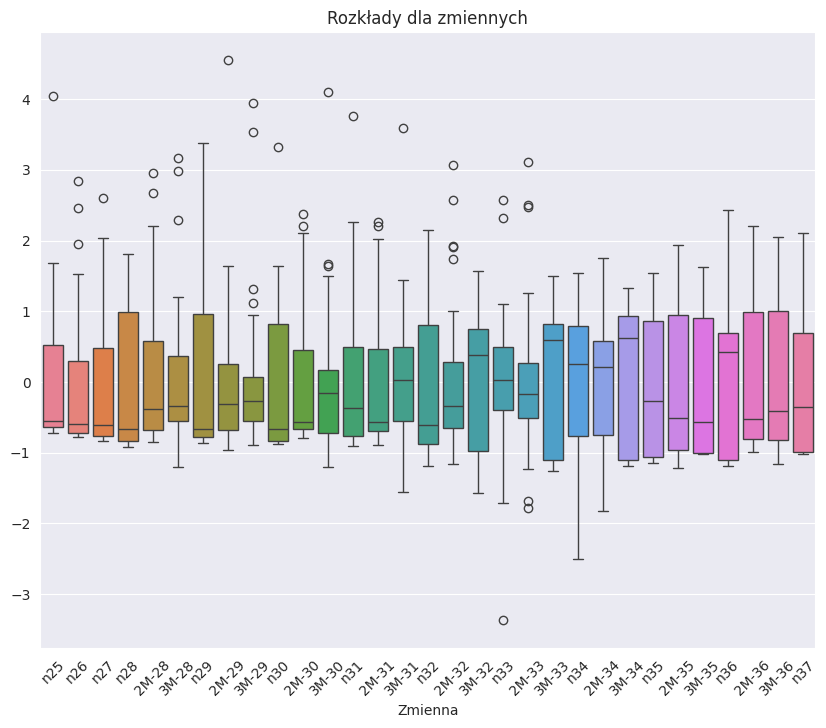

In [67]:
plt.figure(figsize=(10,8))
sns.boxplot(data=eggplants_standarized, orient='v')
plt.title("Rozkłady dla zmiennych")
plt.xlabel("Zmienna")
plt.xticks(rotation=45)
plt.show()

<h4>Wykonanie analizy PCA</h4>

In [48]:
pca_model = PCA(n_components=10)

eggplants_pca = pd.DataFrame(pca_model.fit_transform(eggplants_standarized))

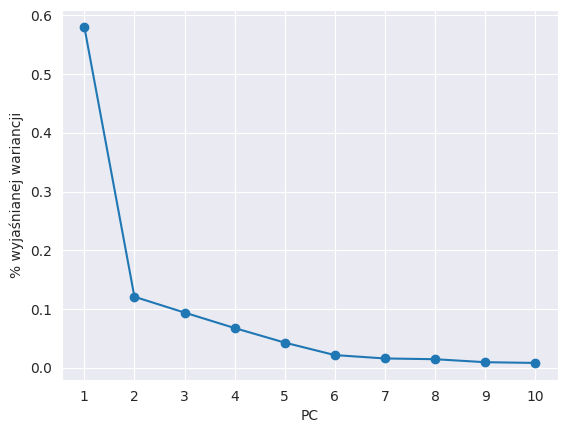

In [50]:
plt.plot(range(1,11),pca_model.explained_variance_ratio_)
plt.scatter(range(1,11),pca_model.explained_variance_ratio_)
plt.xlabel("PC")
plt.ylabel("% wyjaśnianej wariancji")
plt.xticks(range(1,11))
plt.show()

<h4>Zestawienie ze sobą pierwszych 3 głównych składowych 

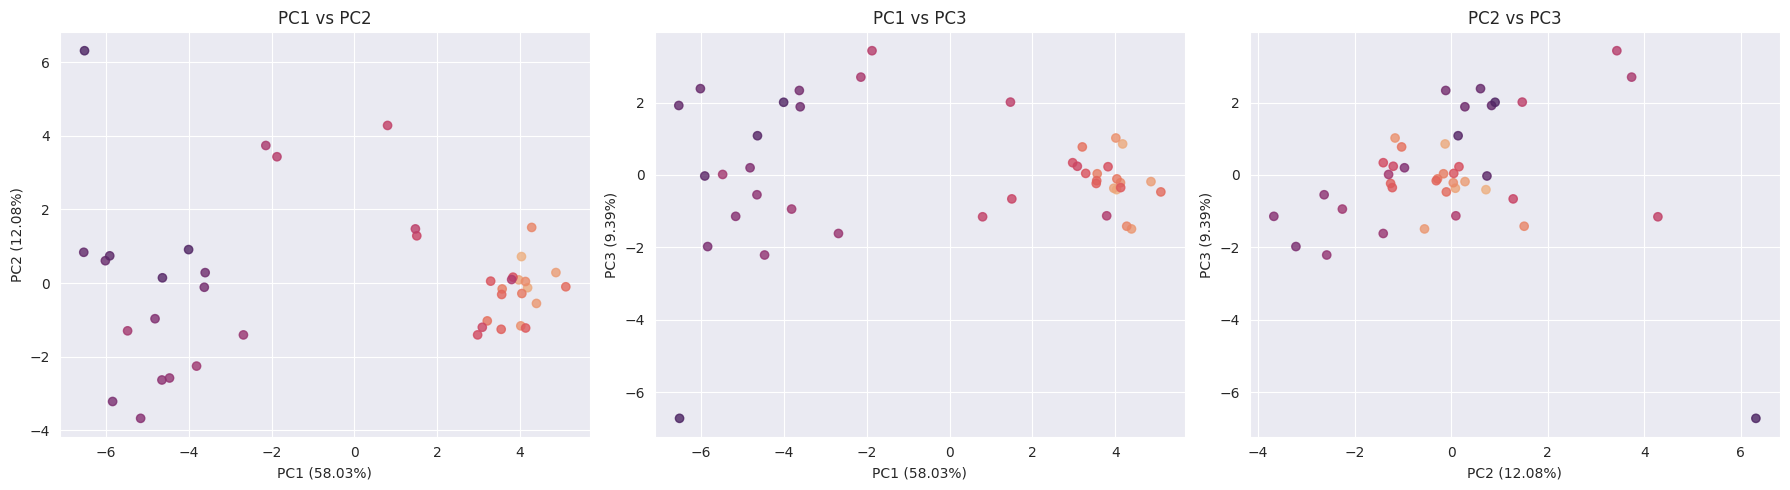

In [57]:
# Create a figure with 3 subplots for pairwise comparisons of first 3 principal components
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate a colormap for the data points
colors = sns.cm.flare(np.linspace(0, 1, len(eggplants_pca)))

# PC1 vs PC2
scatter1 = axes[0].scatter(eggplants_pca[0], eggplants_pca[1], c=colors, alpha=0.8)
axes[0].set_xlabel('PC1 ({}%)'.format(round(pca_model.explained_variance_ratio_[0]*100, 2)))
axes[0].set_ylabel('PC2 ({}%)'.format(round(pca_model.explained_variance_ratio_[1]*100, 2)))
axes[0].set_title('PC1 vs PC2')
axes[0].grid(True)

# PC1 vs PC3
scatter2 = axes[1].scatter(eggplants_pca[0], eggplants_pca[2], c=colors, alpha=0.8)
axes[1].set_xlabel('PC1 ({}%)'.format(round(pca_model.explained_variance_ratio_[0]*100, 2)))
axes[1].set_ylabel('PC3 ({}%)'.format(round(pca_model.explained_variance_ratio_[2]*100, 2)))
axes[1].set_title('PC1 vs PC3')
axes[1].grid(True)

# PC2 vs PC3
scatter3 = axes[2].scatter(eggplants_pca[1], eggplants_pca[2], c=colors, alpha=0.8)
axes[2].set_xlabel('PC2 ({}%)'.format(round(pca_model.explained_variance_ratio_[1]*100, 2)))
axes[2].set_ylabel('PC3 ({}%)'.format(round(pca_model.explained_variance_ratio_[2]*100, 2)))
axes[2].set_title('PC2 vs PC3')
axes[2].grid(True)

plt.tight_layout()
plt.show()

<h4>Zastosowanie metody HCA w celu sklastrowania organizmów przy użyciu 3 głównych składowych</h4>

In [72]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(eggplants_pca.iloc[:,:3], method="complete", metric="euclidean")

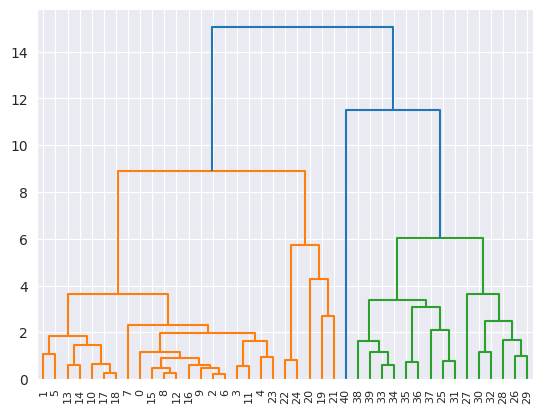

In [69]:
dendrogram(complete_clustering)
plt.show()

<h4>Ucięcie drzewa na 70% jego maksymalnej wysokości</h4>

Number of clusters at cutoff 10.54: 3


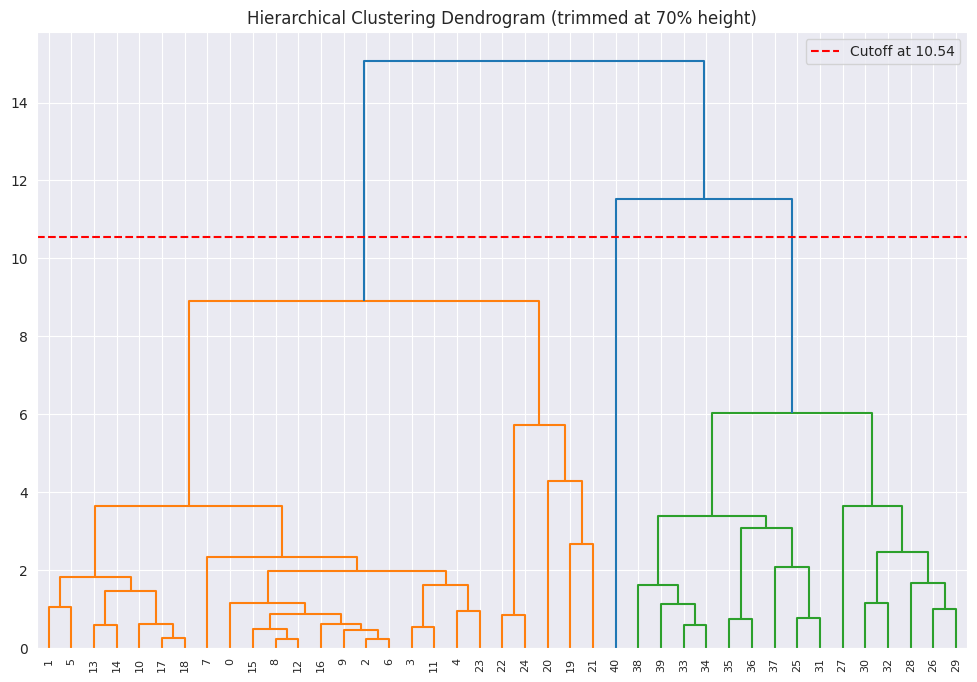

In [73]:
from scipy.cluster.hierarchy import fcluster

# Calculate the height cutoff at 70% of maximum height
height_cutoff = 0.7 * max(complete_clustering[:,2])

# Create a dendrogram with a horizontal line at the cutoff
plt.figure(figsize=(12, 8))
plt.title("Hierarchical Clustering Dendrogram (trimmed at 70% height)")
dendrogram(complete_clustering, color_threshold=height_cutoff)

# Add a horizontal line at the cutoff
plt.axhline(y=height_cutoff, c='r', linestyle='--', label=f'Cutoff at {height_cutoff:.2f}')
plt.legend()

# Determine clusters based on the cutoff
clusters = fcluster(complete_clustering, height_cutoff, criterion='distance')

# Print cluster information
print(f"Number of clusters at cutoff {height_cutoff:.2f}: {len(np.unique(clusters))}")
plt.show()

W tym przypadku ucięcie drzewa nie spowoduje dużych zmian